#### Aquí encontrarás todo lo que necesitas saber: https://www.kaggle.com/t/ab8726f0cfc84544abbae69a6be88071

## Librerias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import urllib.request
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np


import optuna

## Data

In [2]:
### Para que funcione necesitas bajarte los archivos de datos de Kaggle 

train = pd.read_csv("C:/Users/jamf1/OneDrive/Documents/BOOTCAMP/KAGGLE/Credit/KAGGLE MODELS/DATA/train.csv")
train.head(5)


,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,19491,0,0.798858,34y,0,0.478435,3500.0,5,0,1,0,0.0
1,149998,0,0.000000,30y,0,0.000000,5716.0,4,0,0,0,0.0
2,104899,1,0.906530,26y,0,426.000000,NaN,3,0,0,0,0.0
3,52731,0,0.026919,37y,0,1.017536,4333.0,15,0,2,0,0.0
4,73948,0,0.316901,54y,0,0.236717,21624.0,11,0,3,0,2.0


In [34]:
train.describe()

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,73363.000000,73363.000000,73363.000000,73363.000000,73363.000000,5.879600e+04,73363.000000,73363.000000,73363.000000,73363.000000,71460.000000
mean,74872.773005,0.066082,5.733865,0.411747,356.320191,6.713453e+03,8.442430,0.255865,1.017066,0.232065,0.756297
std,43299.771461,0.248428,226.828333,4.089621,2164.354773,1.785420e+04,5.115313,4.064638,1.141430,4.051417,1.113941
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37343.500000,0.000000,0.029803,0.000000,0.174562,3.376750e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,74699.000000,0.000000,0.155165,0.000000,0.365460,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112477.500000,0.000000,0.565279,0.000000,0.868657,8.213000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,149999.000000,1.000000,29110.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,13.000000


In [3]:
def modify_data_1(df, testd=False):
    df.set_index("Id", inplace = True)
    df["age"] = df["age"].str.replace("y", "")
    df["age"] = df["age"].astype('int64')  
    df["RevolvingUtilizationOfUnsecuredLines"] = df["RevolvingUtilizationOfUnsecuredLines"].round(2)
    df["DebtRatio"] = df["DebtRatio"].round(2)

    
   
    if testd ==False:
        en = LabelEncoder()
        for col in df.columns[1:]:
            df[col] = en.fit_transform(df[col]) 

    else:
        en = LabelEncoder()
        for col in df.columns:
            df[col] = en.fit_transform(df[col])



    
    return df


In [4]:
train = modify_data_1(train)
train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Id,,,,,,,,,,,
19491,0,80,14,0,48,2329,5,0,1,0,0
149998,0,0,10,0,0,4367,4,0,0,0,0
104899,1,91,6,0,989,10569,3,0,0,0,0
52731,0,3,17,0,102,3101,15,0,2,0,0
73948,0,32,34,0,24,10126,11,0,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...
76462,0,4,37,0,154,200,17,0,1,0,0
79685,0,18,29,1,1086,10569,9,0,0,0,0
137726,0,100,20,1,48,1266,3,2,0,0,2


## Data exploration

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73363 entries, 19491 to 37862
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   SeriousDlqin2yrs                      73363 non-null  int64
 1   RevolvingUtilizationOfUnsecuredLines  73363 non-null  int64
 2   age                                   73363 non-null  int64
 3   NumberOfTime30-59DaysPastDueNotWorse  73363 non-null  int64
 4   DebtRatio                             73363 non-null  int64
 5   MonthlyIncome                         73363 non-null  int64
 6   NumberOfOpenCreditLinesAndLoans       73363 non-null  int64
 7   NumberOfTimes90DaysLate               73363 non-null  int64
 8   NumberRealEstateLoansOrLines          73363 non-null  int64
 9   NumberOfTime60-89DaysPastDueNotWorse  73363 non-null  int64
 10  NumberOfDependents                    73363 non-null  int64
dtypes: int64(11)
memory usage: 6.7 MB


## Data processing

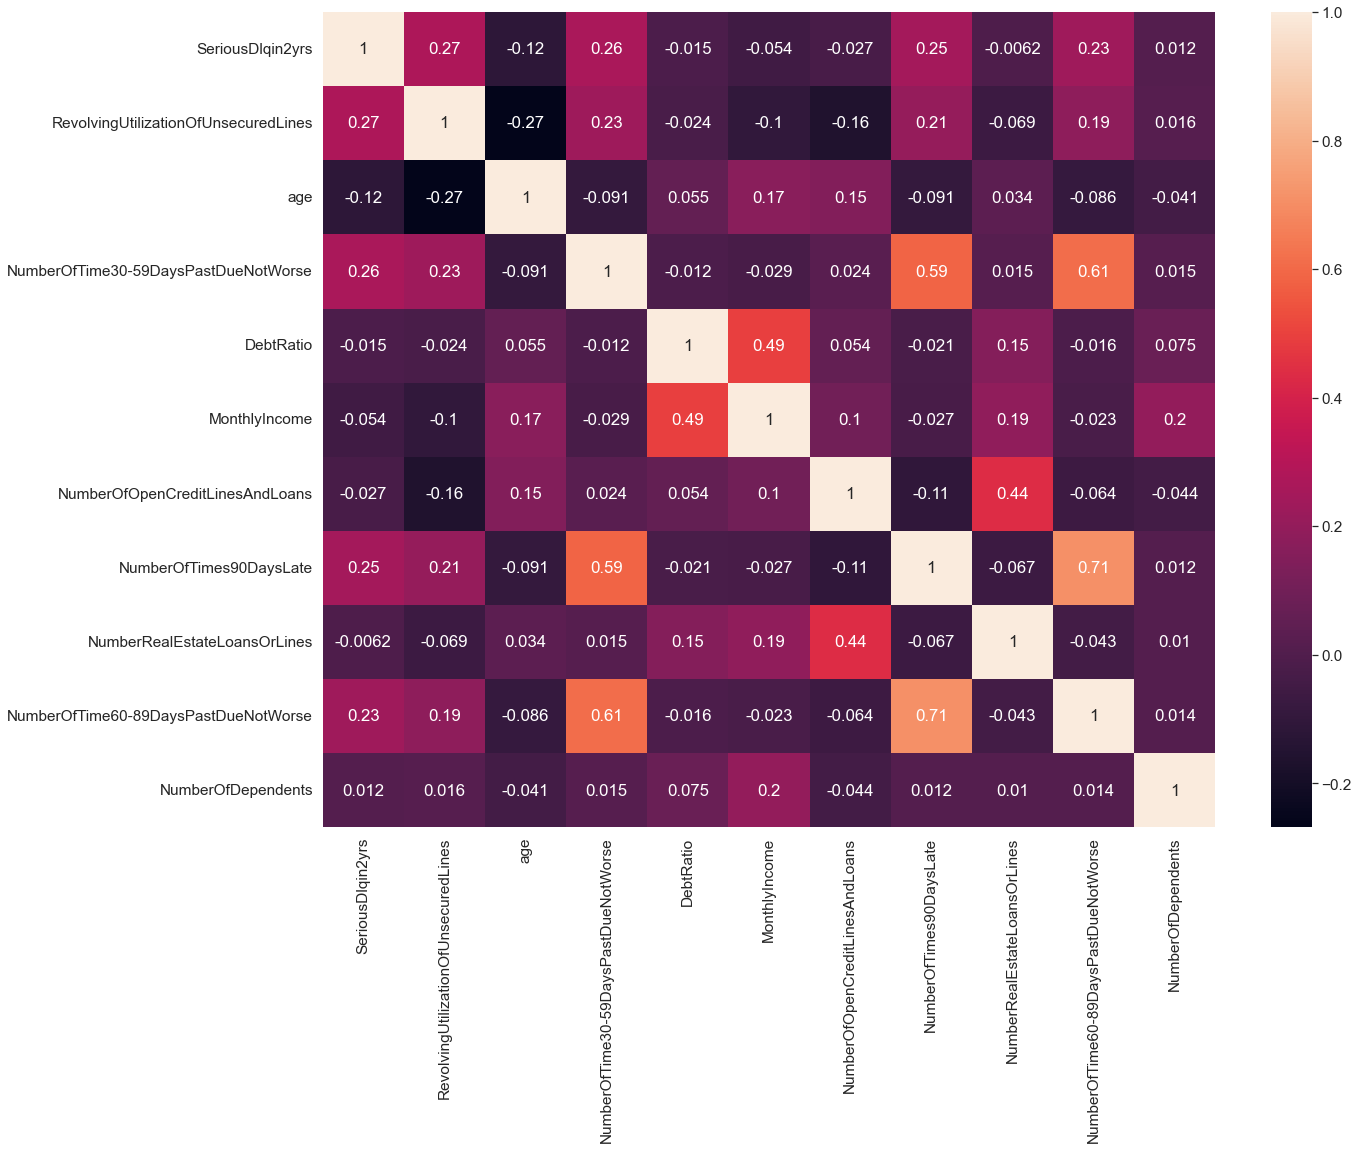

In [6]:
plt.figure(figsize=(20, 15))
sns.set(font_scale=1.4)
sns.heatmap(train.corr(), annot=True);

-----------------------------------------------------------------------------------------------------------------

## Pasos que si o si debéis realizar para poder participar en la competición:

### 1. Definir X e y

In [5]:
X = train.drop(['SeriousDlqin2yrs'], axis=1)
y = train['SeriousDlqin2yrs'].copy()
X.shape

(73363, 10)

### 2. Dividir X_train, X_test, y_train, y_test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 0)

### 4. Sacar métricas, valorar el modelo 

Recuerda que en la competición se va a evaluar con la métrica de MAE.

In [31]:
from sklearn import ensemble, model_selection
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score, KFold

In [46]:
classifier = ensemble.RandomForestClassifier(n_jobs=-1)
parameters = {
    "n_estimators": np.arange(1250, 1300, 10),
    'max_depth': np.arange(10, 15),
    'random_state': np.arange(40, 45),
    "min_samples_leaf":  np.arange(10, 20)
}

kfold = KFold(n_splits=10)
clf = model_selection.RandomizedSearchCV(estimator = classifier, 
                  param_distributions= parameters,
                  scoring=make_scorer(roc_auc_score, greater_is_better=True,
                             needs_threshold=True),
                  n_iter=20,
                  cv = kfold,
                  n_jobs=1,
                  verbose=10
                  )

clf.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV 1/10; 1/20] START max_depth=13, min_samples_leaf=10, n_estimators=1260, random_state=44
[CV 1/10; 1/20] END max_depth=13, min_samples_leaf=10, n_estimators=1260, random_state=44;, score=0.869 total time=   6.2s
[CV 2/10; 1/20] START max_depth=13, min_samples_leaf=10, n_estimators=1260, random_state=44
[CV 2/10; 1/20] END max_depth=13, min_samples_leaf=10, n_estimators=1260, random_state=44;, score=0.872 total time=   6.2s
[CV 3/10; 1/20] START max_depth=13, min_samples_leaf=10, n_estimators=1260, random_state=44
[CV 3/10; 1/20] END max_depth=13, min_samples_leaf=10, n_estimators=1260, random_state=44;, score=0.862 total time=   5.9s
[CV 4/10; 1/20] START max_depth=13, min_samples_leaf=10, n_estimators=1260, random_state=44
[CV 4/10; 1/20] END max_depth=13, min_samples_leaf=10, n_estimators=1260, random_state=44;, score=0.862 total time=   5.7s
[CV 5/10; 1/20] START max_depth=13, min_samples_leaf=10, n_estimators=1260, r

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(n_jobs=-1), n_iter=20,
                   n_jobs=1,
                   param_distributions={'max_depth': array([10, 11, 12, 13, 14]),
                                        'min_samples_leaf': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'n_estimators': array([1250, 1260, 1270, 1280, 1290]),
                                        'random_state': array([40, 41, 42, 43, 44])},
                   scoring=make_scorer(roc_auc_score, needs_threshold=True),
                   verbose=10)

In [47]:
clf.best_score_

0.86236177268581

In [48]:
clf.best_estimator_

RandomForestClassifier(max_depth=12, min_samples_leaf=19, n_estimators=1290,
                       n_jobs=-1, random_state=44)

In [49]:
print(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))

0.8714090056715764


In [7]:
rnd_clf = RandomForestClassifier(max_depth=12, min_samples_leaf=19, n_estimators=1290,
                       n_jobs=-1, random_state=44)
rnd_clf.fit(X_train, y_train)


# np.sum(y_test == y_pred_rf) / len(y_test) 
print(roc_auc_score(y_test, rnd_clf.predict_proba(X_test)[:,1]))

0.8714090056715764


-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir con el dataset de predicción 

Definición de **modelo que está listo**. 

Tras hacer suficientes pruebas, analizar los datos, hacer feature engineering, probar diferentes modelos con diferentes parámetros, es con este con el que observo mejores métricas y menos overfitting. ¡Cuidado con el overfitting aquí! Si vuestro modelo aprende muy bien de estos datos pero hay overfitting cuando le pasemos los datos desconocidos de `test.csv` nos arriesgamos a que digamos, no salga lo esperado.

### 1. Entrena dicho modelo con TODOS tus datos de train, esto es con `train.csv` al completo.


**CON LAS TRANSFORMACIONES QUE LE HAYAS REALIZADO A `X` INCLUÍDAS.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 2. Carga los datos de `test.csv` para predecir.

In [52]:
X_pred_raw = pd.read_csv("C:/Users/jamf1/OneDrive/Documents/BOOTCAMP/KAGGLE/Credit/KAGGLE MODELS/DATA/test.csv")
X_pred = modify_data_1(X_pred_raw, True)
X_pred

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Id,,,,,,,,,,
99280,71,10,0,2887,6845,6,0,1,0,0
38932,0,35,3,2624,6845,5,0,1,0,0
63810,15,27,0,1,5195,5,0,0,0,1
54278,0,40,0,42,1649,13,0,1,0,1
103450,5,14,1,401,6845,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
83439,100,58,0,2583,6845,5,0,1,0,0
124027,22,33,0,68,1331,14,0,1,0,0
92374,68,15,0,42,4436,12,0,1,0,0


In [37]:
X_pred.shape

(31442, 10)

**¿Por qué da error?** 

In [53]:
predictions_submit =rnd_clf.predict_proba(X_pred)[:,1]
predictions_submit

array([0.0717005 , 0.1154136 , 0.01340132, ..., 0.07183352, 0.01565504,
       0.02860313])

IMPORTANTE: APLICAR LO MISMO A ESTOS DATOS QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 391 FILAS, SI O SI

**Entonces, si al cargar los datos de train usé `index_col=0` para que utilizara la primera columna del conjunto de datos como índice, ¿tendré que hacerlo también para el conjunto `test.csv`?**

In [ ]:
# ¿Qué opináis?
# Sí

![](https://www.tierraljelechu.com/web/img/wiki_up/1.996-SorpresaDto.-1-Red.jpg)

In [20]:
X_pred = pd.read_csv("Dataset/test.csv", index_col=0)
X_pred.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
id,,,,,,,,,,,
1184,HP,Pavilion 15-BC000nv,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,6GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.18kg
815,Lenovo,Thinkpad T470s,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.32kg
1244,HP,EliteBook 840,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.54kg
1121,HP,Spectre Pro,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.16kg
443,Lenovo,IdeaPad 320-15IAP,Notebook,15.6,Full HD 1920x1080,Intel Pentium Quad Core N4200 1.1GHz,4GB,128GB SSD,Intel HD Graphics 505,Windows 10,2.2kg


### 3. AHORA puedo hacer la predicción que será lo que subirás a Kaggle. 

**¿Qué es lo que subirás a Kaggle?**

In [24]:
predictions_submit = model.predict(X_pred)
predictions_submit

array([ -260.20029487,   116.70396517,  9699.26794807, ...,
        8903.59284445, 10336.93013348,  -601.00685048])

**¡PERO! Para subir a Kaggle la predicción, ésta tendrá que tener una forma específica y no valdrá otra.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [59]:
sample = pd.read_csv("C:/Users/jamf1/OneDrive/Documents/BOOTCAMP/KAGGLE/Credit/KAGGLE MODELS/DATA/sample_submission.csv")

In [60]:
sample.head()

,Id,SeriousDlqin2yrs
0,99280,1
1,38932,0
2,63810,0
3,54278,1
4,103450,0


In [42]:
sample.shape

(31442, 2)

### 4. Mete tus predicciones en un dataframe. 

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [54]:
submission = pd.DataFrame(X_pred.index, columns=["Id"])
submission["SeriousDlqin2yrs"] = predictions_submit
submission

,Id,SeriousDlqin2yrs
0,99280,0.071700
1,38932,0.115414
2,63810,0.013401
3,54278,0.013498
4,103450,0.039294
...,...,...
31437,83439,0.030268
31438,124027,0.040733
31439,92374,0.071834
31440,116097,0.015655


In [55]:
submission.head()

,Id,SeriousDlqin2yrs
0,99280,0.071700
1,38932,0.115414
2,63810,0.013401
3,54278,0.013498
4,103450,0.039294


In [56]:
submission.shape

(31442, 2)

### 5. Pásale el CHEQUEATOR para comprobar que efectivamente está listo para subir a Kaggle.

In [57]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.Id.all() == sample.Id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")


In [61]:
chequeator(submission)

You're ready to submit!
